In [3]:
# Setup Dependencies and Constants

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
from citipy import citipy

# Output File (CSV)
output_folder = "output_data"
output_filename = "cities"
output_file_type = "csv"
output_file = f"{output_folder}/{output_filename}.{output_file_type}"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
random_coordinates = 1500
total_cities = 500

# Weather API URL
url_stem = "http://api.openweathermap.org/data/2.5/weather?q="

print(f"""{str(total_cities)} cities will be found by searching up to {str(random_coordinates)} coordinates
between latitude {str(lat_range[0])} and {str(lat_range[1])}, and
between longitude {str(lng_range[0])} and {str(lng_range[1])}.""")
print(f"""
The cities' weather will be returned from,
{url_stem}<city>&appid=api_key&units=Imperial, 
and will be saved to: ./{output_file}""")

500 cities will be found by searching up to 1500 coordinates
between latitude -90 and 90, and
between longitude -180 and 180.

The cities' weather will be returned from,
http://api.openweathermap.org/data/2.5/weather?q=<city>&appid=api_key&units=Imperial, 
and will be saved to: ./output_data/cities.csv


In [4]:
# Generate Cities List

# Lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=random_coordinates)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=random_coordinates)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
print(f"{str(total_cities)} cities found")

609 cities found


In [5]:
# Print weather for a city
def print_weather(city_weather,city_num):
    city = dict(city_weather)
    city_number = str(city_num)
    city_name = city['City']
    city_latitude = str(city['Latitude'])
    city_longitude = str(city['Longitude'])
    city_max_temp = str(city['Maximum Temperature (F)'])
    city_humidity = str(city['Humidity (%)'])
    city_cloudiness = str(city['Cloudiness (%)'])
    city_wind_speed  = str(city['Wind Speed (MPH)'])
    print(f"City Weather #{city_number} {city_name} ({city_latitude},{city_longitude}): {city_max_temp}F {city_humidity}% Humidity {city_cloudiness}% Cloudy {city_wind_speed} mph Wind")
    pass
    
# Get Weather for a City
def get_city_weather(city):
    url = f"{url_stem}{city}&appid={api_key}&units=Imperial"
    weather_response = requests.get(url)
    weather = weather_response.json()
    latitude = weather["coord"]["lat"]
    longitude = weather["coord"]["lon"]
    max_temp = weather["main"]["temp_max"]
    humidity = weather["main"]["humidity"]
    cloudiness = weather["clouds"]["all"]
    wind_speed = weather["wind"]["speed"]
    return {"City":city,
            "Latitude":latitude,
            "Longitude":longitude,
            "Maximum Temperature (F)":max_temp,
            "Humidity (%)":humidity,
            "Cloudiness (%)":cloudiness,
            "Wind Speed (MPH)":wind_speed}

In [6]:
# Get Weather for All Cities
cities_found = 0
for city_num in range(1,total_cities):
    try:
        city_data = get_city_weather(cities[city_num])
        cities_found+=1
        print_weather(city_data,city_num)
        if cities_found==1:
            citydf = pd.DataFrame(city_data,index=[city_num])
        else:
            citydf = citydf.append(pd.DataFrame(city_data,index=[city_num]))
    except:
        print(f"Skipping #{str(city_num)} {cities[city_num]}")
print(f"Weather for {str(cities_found)} cities retrieved.")

City Weather #1 cidreira (-30.17,-50.22): 66.83F 76% Humidity 86% Cloudy 13.76 mph Wind
City Weather #2 avarua (-21.21,-159.78): 69.8F 77% Humidity 67% Cloudy 4.7 mph Wind
City Weather #3 punta arenas (-53.16,-70.91): 46.4F 65% Humidity 40% Cloudy 23.04 mph Wind
City Weather #4 yumen (40.29,97.04): 52.61F 56% Humidity 0% Cloudy 25.61 mph Wind
City Weather #5 ushuaia (-54.81,-68.31): 48.2F 52% Humidity 75% Cloudy 28.86 mph Wind
City Weather #6 rikitea (-23.12,-134.97): 67.91F 77% Humidity 0% Cloudy 16.89 mph Wind
City Weather #7 hilo (19.71,-155.08): 75.2F 83% Humidity 90% Cloudy 8.05 mph Wind
City Weather #8 hobart (-42.88,147.33): 57.99F 66% Humidity 100% Cloudy 4.5 mph Wind
City Weather #9 ponta do sol (-20.63,-46): 85.37F 28% Humidity 0% Cloudy 7.54 mph Wind
City Weather #10 hithadhoo (-0.6,73.08): 82.49F 75% Humidity 100% Cloudy 12.39 mph Wind
City Weather #11 saldanha (41.42,-6.55): 77.09F 27% Humidity 7% Cloudy 6.4 mph Wind
City Weather #12 sosnogorsk (63.59,53.93): 34.43F 84% Hu

Skipping #102 vaitupu
City Weather #103 constitucion (23.99,-104.67): 64.99F 77% Humidity 20% Cloudy 4.47 mph Wind
Skipping #104 samusu
City Weather #105 castro (-42.48,-73.76): 51.8F 53% Humidity 0% Cloudy 11.41 mph Wind
Skipping #106 rawannawi
City Weather #107 pundaguitan (6.37,126.17): 82.13F 74% Humidity 62% Cloudy 7.82 mph Wind
City Weather #108 tilichiki (60.47,166.1): 21.29F 82% Humidity 0% Cloudy 3.31 mph Wind
Skipping #109 belushya guba
City Weather #110 kavieng (-2.57,150.8): 83.21F 70% Humidity 94% Cloudy 2.59 mph Wind
City Weather #111 half moon bay (37.46,-122.43): 57F 82% Humidity 20% Cloudy 8.05 mph Wind
City Weather #112 cape town (-33.93,18.42): 68F 63% Humidity 20% Cloudy 14.99 mph Wind
Skipping #113 tabiauea
City Weather #114 nipawin (53.36,-104.02): 33.8F 80% Humidity 75% Cloudy 5.82 mph Wind
City Weather #115 fortuna (38.18,-1.13): 88F 25% Humidity 71% Cloudy 4.7 mph Wind
City Weather #116 hofn (64.25,-15.21): 48.2F 76% Humidity 90% Cloudy 18.34 mph Wind
City Weat

City Weather #206 balabac (7.99,117.06): 81.05F 74% Humidity 8% Cloudy 3.06 mph Wind
City Weather #207 coquimbo (-29.95,-71.34): 55.4F 66% Humidity 0% Cloudy 8.05 mph Wind
City Weather #208 leningradskiy (69.38,178.42): 29.39F 83% Humidity 100% Cloudy 3.49 mph Wind
City Weather #209 nanortalik (60.14,-45.24): 42.71F 70% Humidity 100% Cloudy 1.63 mph Wind
City Weather #210 sobolevo (54.43,31.9): 58.01F 87% Humidity 100% Cloudy 10.59 mph Wind
City Weather #211 pevek (69.7,170.27): 28.49F 81% Humidity 100% Cloudy 5.23 mph Wind
City Weather #212 songea (-10.68,35.65): 78.17F 48% Humidity 99% Cloudy 6.53 mph Wind
City Weather #213 anadyr (64.73,177.51): 28.4F 92% Humidity 90% Cloudy 29.08 mph Wind
City Weather #214 san quintin (17.54,120.52): 74.75F 91% Humidity 92% Cloudy 2.86 mph Wind
City Weather #215 kodiak (39.95,-94.76): 51.8F 76% Humidity 75% Cloudy 11.41 mph Wind
City Weather #216 kilindoni (-7.91,39.67): 79.07F 77% Humidity 75% Cloudy 16.87 mph Wind
Skipping #217 dujuma
City Weathe

City Weather #307 lavrentiya (65.58,-170.99): 29.21F 80% Humidity 100% Cloudy 5.93 mph Wind
City Weather #308 ahipara (-35.17,173.16): 48F 100% Humidity 87% Cloudy 17.83 mph Wind
City Weather #309 udayagiri (12.32,76.68): 78.8F 74% Humidity 40% Cloudy 6.93 mph Wind
City Weather #310 kiruna (67.86,20.23): 32F 61% Humidity 75% Cloudy 5.82 mph Wind
City Weather #311 bredasdorp (-34.53,20.04): 68F 49% Humidity 0% Cloudy 14.99 mph Wind
City Weather #312 narsaq (60.91,-46.05): 51.8F 29% Humidity 75% Cloudy 17.22 mph Wind
City Weather #313 caibarien (22.52,-79.47): 80.6F 78% Humidity 75% Cloudy 6.93 mph Wind
City Weather #314 alofi (-19.06,-169.92): 71.6F 100% Humidity 100% Cloudy 4.7 mph Wind
City Weather #315 wanning (48.64,13.53): 53.6F 62% Humidity 75% Cloudy 14.99 mph Wind
City Weather #316 salazie (-21.03,55.54): 77F 73% Humidity 90% Cloudy 11.41 mph Wind
City Weather #317 chepareria (1.32,35.2): 80.33F 47% Humidity 39% Cloudy 5.03 mph Wind
City Weather #318 seybaplaya (19.65,-90.67): 8

City Weather #408 xuanhua (40.61,115.04): 57.83F 78% Humidity 100% Cloudy 9.95 mph Wind
City Weather #409 torzhok (57.04,34.97): 55.49F 90% Humidity 100% Cloudy 6.31 mph Wind
City Weather #410 norman wells (65.28,-126.83): 41F 100% Humidity 90% Cloudy 4.7 mph Wind
City Weather #411 buala (-8.15,159.59): 78.71F 83% Humidity 100% Cloudy 11.41 mph Wind
City Weather #412 matamoros (25.87,-97.51): 87.8F 70% Humidity 1% Cloudy 6.93 mph Wind
City Weather #413 port blair (11.67,92.75): 83.21F 67% Humidity 59% Cloudy 4.83 mph Wind
Skipping #414 labrea
City Weather #415 kruisfontein (-34,24.73): 61.61F 70% Humidity 27% Cloudy 14 mph Wind
Skipping #416 meyungs
City Weather #417 neustadt (47.05,8.31): 61F 50% Humidity 0% Cloudy 3.36 mph Wind
City Weather #418 lewistown (40.39,-90.15): 59F 82% Humidity 90% Cloudy 12.75 mph Wind
City Weather #419 camacari (-12.7,-38.32): 78.8F 78% Humidity 75% Cloudy 12.75 mph Wind
City Weather #420 ayni (39.39,68.54): 41.45F 77% Humidity 97% Cloudy 1.34 mph Wind
Ci

City Weather #509 rabo de peixe (37.8,-25.58): 73.4F 60% Humidity 75% Cloudy 8.05 mph Wind
City Weather #510 zaranj (30.95,61.86): 80.6F 21% Humidity 0% Cloudy 9.17 mph Wind
City Weather #511 cortes (9.28,126.19): 81.59F 76% Humidity 100% Cloudy 5.55 mph Wind
Skipping #512 sorkjosen
City Weather #513 chimore (-16.98,-65.13): 62.15F 94% Humidity 99% Cloudy 2.44 mph Wind
City Weather #514 pechora (65.12,57.16): 35.15F 86% Humidity 92% Cloudy 9.35 mph Wind
City Weather #515 leamington (42.05,-82.6): 72F 100% Humidity 90% Cloudy 9.17 mph Wind
City Weather #516 sulangan (11.14,123.72): 83.03F 75% Humidity 100% Cloudy 6.8 mph Wind
City Weather #517 te anau (-45.41,167.72): 41.09F 87% Humidity 54% Cloudy 6.13 mph Wind
City Weather #518 guhagar (17.48,73.19): 83.39F 79% Humidity 88% Cloudy 13.96 mph Wind
City Weather #519 vila velha (-3.71,-38.6): 87.8F 48% Humidity 20% Cloudy 21.92 mph Wind
City Weather #520 nkhotakota (-12.93,34.3): 74.39F 68% Humidity 31% Cloudy 8.9 mph Wind
City Weather #5

In [7]:
# Display dataframe
citydf.head()

,City,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
1,cidreira,-30.17,-50.22,66.83,76,86,13.76
2,avarua,-21.21,-159.78,69.80,77,67,4.70
3,punta arenas,-53.16,-70.91,46.40,65,40,23.04
4,yumen,40.29,97.04,52.61,56,0,25.61
5,ushuaia,-54.81,-68.31,48.20,52,75,28.86


In [8]:
# Export city weather data to CSV
citydf.to_csv(f"{output_file}")

# Show Correlations
citydf.corr(method='pearson')

,Latitude,Longitude,Maximum Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
Latitude,1.000000,-0.050072,-0.536571,0.171377,0.145669,-0.044978
Longitude,-0.050072,1.000000,-0.075278,0.045727,0.061917,-0.012584
Maximum Temperature (F),-0.536571,-0.075278,1.000000,-0.381286,-0.215681,-0.063811
Humidity (%),0.171377,0.045727,-0.381286,1.000000,0.361936,-0.108195
Cloudiness (%),0.145669,0.061917,-0.215681,0.361936,1.000000,0.028124
Wind Speed (MPH),-0.044978,-0.012584,-0.063811,-0.108195,0.028124,1.000000


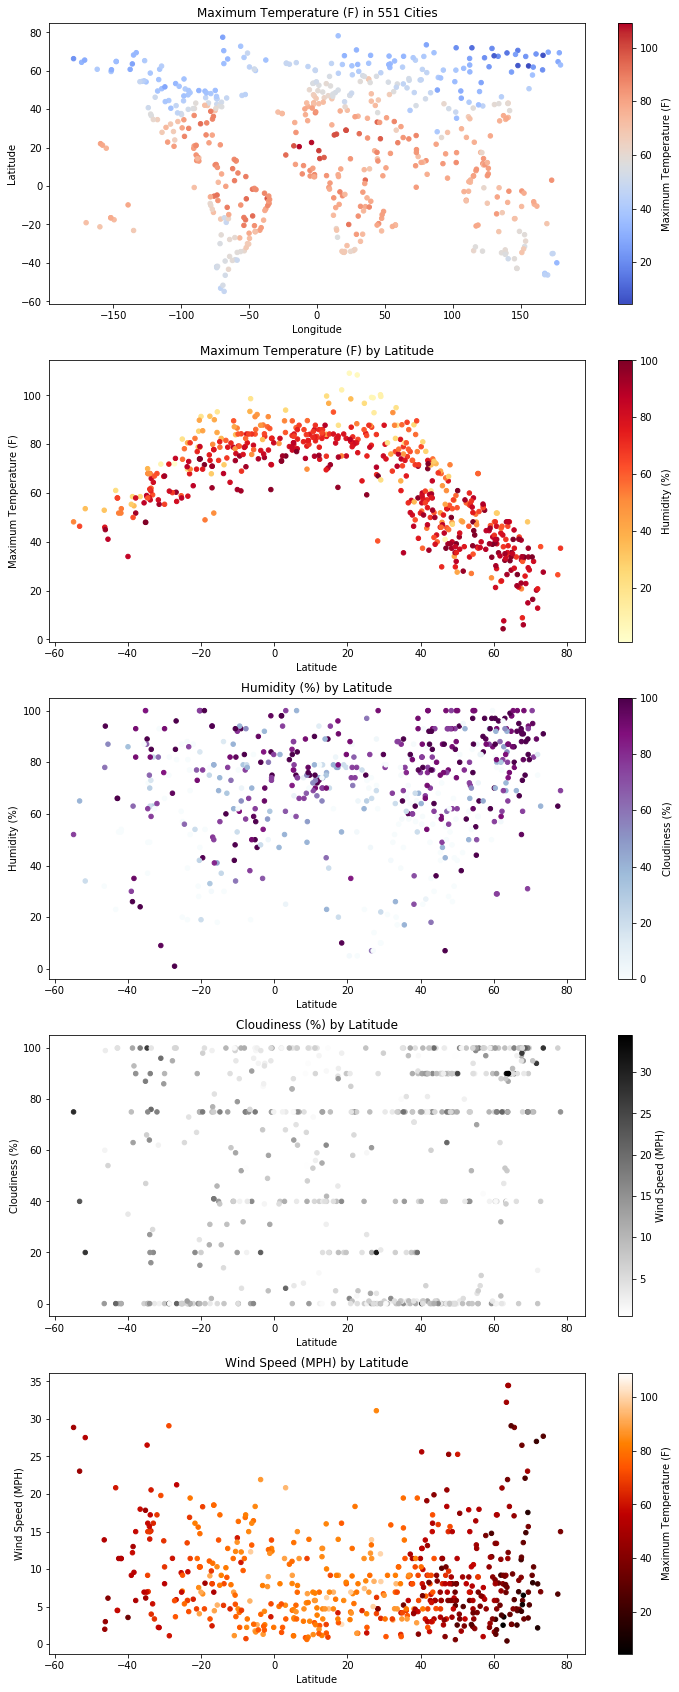

In [9]:
# Chart Wheather
fig = plt.figure(figsize=(12,30))
ax0 = fig.add_subplot(511)
citydf.plot.scatter(x='Longitude',
                    y='Latitude',
                    c='Maximum Temperature (F)',
                    colormap='coolwarm',
                    title=f"Maximum Temperature (F) in {str(cities_found)} Cities",
                    ax=ax0)
ax1 = fig.add_subplot(512)
citydf.plot.scatter(x='Latitude',
                    y='Maximum Temperature (F)',
                    c='Humidity (%)',
                    colormap='YlOrRd',
                    title=f"Maximum Temperature (F) by Latitude",
                    ax=ax1)
ax2 = fig.add_subplot(513)
citydf.plot.scatter(x='Latitude',
                    y='Humidity (%)',
                    c='Cloudiness (%)',
                    colormap='BuPu',
                    title=f"Humidity (%) by Latitude",
                    ax=ax2)
ax3 = fig.add_subplot(514)
citydf.plot.scatter(x='Latitude',
                    y='Cloudiness (%)',
                    c='Wind Speed (MPH)',
                    colormap='binary',
                    title=f"Cloudiness (%) by Latitude",
                    ax=ax3)
ax4 = fig.add_subplot(515)
citydf.plot.scatter(x='Latitude',
                    y='Wind Speed (MPH)',
                    c='Maximum Temperature (F)',
                    colormap='gist_heat',
                    title=f"Wind Speed (MPH) by Latitude",
                    ax=ax4)
fig.savefig(f"{output_folder}/charts.png")

* All cities were plotted by latitude and longitude to verify a random distibution throughout the world.
* Maximum temperature has a strong curvilinear relationship with latitude.  As the poles are approached, temperature drops.
* Latitude appears to have no relationship with cloudiness.
* Latitude may have a weak curvilinear relationship with humidity and wind speed. The relationship of humidity is in the same direction as temperature, while wind speed is inverse.